In [28]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npt
import seaborn as sns

In [29]:
df = pd.read_csv('Default.csv', index_col=0)

df['default_binary'] = df.default.apply(lambda x : 1 if x == "Yes" else 0)

In [30]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


# Validation Strategy

The validation strategy is one of the most important steps in machine learning. If one fails to effectivelly validate your machine learning model, the results may be unexpectedly bad.

The idea is to create steps that will help you make a good estimate of your error on data as it will come in real life. We've seen that:
- if your model is too complex, it may memorize your training data (high variance)
- if your model is too simple, you'll have performance problems (high bias)

If your model memorizes your training data, you'll probably obtain a good performance score on your data, but when real data comes to you, you'll lose performance. We say that the model didn't `GENERALIZE` the patterns to unseen data. It means your error estimates were wrong. What can we do to avoid that?

We can simulate what real life would look like. For example, one strategy is to hide some data from your model, to check its reliability on this never-seen data.

## Hold-Out

In [31]:
def draw_rects(N, ax, textprop={}):
    
    for i in range(N):
        if i == 1:
            ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', ec='k'), )
            ax.add_patch(plt.Rectangle((7. * i / N, i), 3. / N, 0.7, fc='lightblue', ec='k'), )

            ax.text(2.5 * (i + 0.5) / N, i + 0.35, 'Training\nSet', ha='center', va='center', **textprop)
            ax.text(5.65 * (i + 0.5) / N, i + 0.35, 'Test\nSet', ha='center', va='center', **textprop)
            ax.text(0, i + 0.35, f'', ha='right', va='center', **textprop)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticklabels('')
    ax.set_xticks([])
    ax.set_yticklabels('')
    ax.set_yticks([])
    ax.set_xlim(-1, 6)
    ax.set_ylim(0.5, N + .2)
        

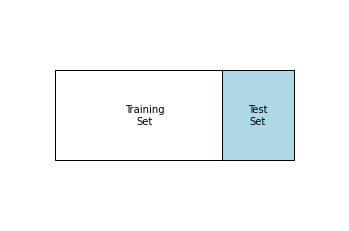

In [27]:
fig, ax = plt.subplots()
draw_rects(2, ax)

The idea of the hold-out is to hide a part of the dataset and use it to test your model performance. The errors measured on your `Test set` will be a better estimate of the model performance in real life.

An important observation is that your model may be performing fairly well on your `Training Set`, but your `Test Set` performance may be poor. This may indicate your model is memorizing your data. 

There are several things that can be happening if you observe that your model is performing much better on the `Training data` than in your `Test data`.

- Model is too complex
    - solution: use a strategy to penalize model complexity if it doesn't bring much gain (regularization)
    
- Data Leakage
    - you may be using some information that you shouldn't have in your training. Information from the future. 

## Holdout in Python

Usually, people tend to separate approximately 20% of the dataset as a test (or holdout) set.

In [453]:
from sklearn.model_selection import train_test_split

In [32]:
X = df[['balance']]
y = df['default_binary']

In [ ]:
train_test_split()

In [64]:
X.head()

,balance
1,729.526495
2,817.180407
3,1073.549164
4,529.250605
5,785.655883


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)
X_test

<IPython.core.display.Javascript object>

,balance
6253,1435.662933
4685,771.789347
1732,0.000000
4743,113.571264
4522,1358.132472
...,...
4210,463.091661
682,241.805252
435,221.690462
9310,1395.602656


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000)

<IPython.core.display.Javascript object>

In [67]:
X_train.shape

(5000, 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=False)

# X_train = X.iloc[0:8000]
# X_test = X.iloc[8000:10000]

# y_train = y.iloc[0:8000]
# y_test = y.iloc[8000:10000]

<IPython.core.display.Javascript object>

In [72]:
X_train.head()

,balance
1,729.526495
2,817.180407
3,1073.549164
4,529.250605
5,785.655883


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.head()

<IPython.core.display.Javascript object>

,balance
9255,1018.568130
1562,62.170050
1671,1046.743543
6088,763.735280
6670,697.248633


## Your error should be estimated using the `Test Set`. This will be a better estimate of your true error.

Not only that, you should also calculate the error on your `Training Set` (called `training error`). This will be a good comparison to check whether your results on your `Test Set` (called `test error`) are getting too far from the results on your `Test Set`, which, again, can indicate an overfitting.

## Data Leakage, example

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [82]:
X = df[['balance']]
y = df['income']

scaler = StandardScaler()
scaler.fit(X)

X_std = scaler.transform(X)
X_std

array([[-0.21883482],
       [-0.03761593],
       [ 0.49241019],
       ...,
       [ 0.02075107],
       [ 1.51674204],
       [-1.31169066]])

In [ ]:
X.fillna(X.mean())

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y)

<IPython.core.display.Javascript object>

In [84]:
model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.028541949195766025

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

What's wrong with the process above?

## Solution: the EXACT same steps used to prepare your training data should be used on the new data 


So, you fit the standard scaler on your training data, and don't fit it again on your test data. Effectively, you'll be using the `mean` and `standard deviation` from the StandardScaler as you've seen on your training data (<b>pipelines</b> will soon come to rescue us for that).

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

In [92]:
model = LinearRegression()

# Standardize data:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

model.fit(X_train_std, y_train)
# let's evaluate - new data comes in:
X_test_std = scaler.transform(X_test)
predictions = model.predict(X_test_std)


In [93]:
scaler.mean_

array([835.13227488])

## Input missing

In [94]:
avg_train = X_train.mean()
avg_train

balance    835.132275
dtype: float64

In [ ]:
X_test.fillna(avg_train)

In [98]:
X = df[['balance','income']]

In [102]:
from statsmodels.formula.api import ols

In [103]:
df

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...
9996,No,No,711.555020,52992.378914,0
9997,No,No,757.962918,19660.721768,0
9998,No,No,845.411989,58636.156984,0
9999,No,No,1569.009053,36669.112365,0


In [114]:
results = ols(formula='income ~ balance + C(student)+ C(default)', data=df).fit()

In [115]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4391.
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        23:27:13   Log-Likelihood:            -1.0497e+05
No. Observations:               10000   AIC:                         2.099e+05
Df Residuals:                    9996   BIC:                         2.100e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.002e+04    180.906    221.241      0.000    3.97e+04    4.04e+04
C(student)[T.Yes] -2.206e+04    196.497   -112.274      0.000   -2.24e+04   -2.17e+04
C(default)[T.Yes]   541.9306    521.726      1.039      0.299    -480.757    1564.618
balance              -0.0359      0.198     -0.182      0.856      -0.423       0.351
==============================================================================
Omnibus:                       92.414   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.945
Skew:                          -0.006   Prob(JB):                     1.01e-33
Kurtosis:                       3.604   Cond. No.                     5.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
df = pd.read_csv('advertising.csv')

In [125]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [124]:
ols('Sales ~ Newspaper + Radio', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.89
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.28e-06
Time:                        23:33:05   Log-Likelihood:                -603.03
No. Observations:                 200   AIC:                             1212.
Df Residuals:                     197   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0607      0.728     16.556      0.000      10.624      13.497
Newspaper      0.0095      0.017      0.548      0.585      -0.025       0.044
Radio          0.1195      0.025      4.708      0.000       0.069       0.170
==============================================================================
Omnibus:                       11.760   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.377
Skew:                          -0.434   Prob(JB):                      0.00920
Kurtosis:                       2.389   Cond. No.                         92.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""